In [63]:
import pandas as pd
import seaborn as sns
import numpy as np

In [64]:
dataset = pd.read_csv('Iris.csv')

In [65]:
X = dataset.iloc[:,:4].values
Y = dataset.iloc[:,4].values

In [66]:
from sklearn.model_selection import train_test_split
 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=7)

In [67]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense
from keras.utils import np_utils

In [68]:
y_train= np_utils.to_categorical( y_train)
y_test = np_utils.to_categorical(y_test)

n_classes= y_test.shape[1]

In [70]:
def design_mlp():
    model = Sequential()
    model.add(Dense(16,input_dim = 4,activation="relu"))
    model.add(Dense(8,activation="relu"))
    model.add(Dense(n_classes,activation="softmax"))
    
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
    return model
model = design_mlp()
print(model.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 16)                80        
_________________________________________________________________
dense_67 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_68 (Dense)             (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________
None


In [71]:
history=model.fit(x_train, y_train, validation_split=0.3, shuffle=True, batch_size=16,epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 32ms/step - loss: 13.4337 - accuracy: 0.2386 - val_loss: 14.1472 - val_accuracy: 0.1538
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 11.4514 - accuracy: 0.2386 - val_loss: 12.0253 - val_accuracy: 0.1538
Epoch 3/100
6/6 [==============================] - 0s 6ms/step - loss: 9.6039 - accuracy: 0.2386 - val_loss: 10.0071 - val_accuracy: 0.1795
Epoch 4/100
6/6 [==============================] - 0s 6ms/step - loss: 7.8378 - accuracy: 0.2500 - val_loss: 8.1148 - val_accuracy: 0.1795
Epoch 5/100
6/6 [==============================] - 0s 6ms/step - loss: 6.2130 - accuracy: 0.2727 - val_loss: 6.3195 - val_accuracy: 0.2051
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 4.7218 - accuracy: 0.2727 - val_loss: 4.6904 - val_accuracy: 0.2051
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 3.5168 - accuracy: 0.2841 - val_loss: 3.3393 - val_accuracy: 0.2051
Epoch 8/100
6/6 [====

In [80]:
for layerNum, layer in enumerate(model.layers):
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    
    for toNeuronNum, bias in enumerate(biases):
        print(f'{layerNum}B -> L{layerNum+1}N{toNeuronNum}: {bias}')
    
    for fromNeuronNum, wgt in enumerate(weights):
        for toNeuronNum, wgt2 in enumerate(wgt):
            print(f'L{layerNum}N{fromNeuronNum} \
                  -> L{layerNum+1}N{toNeuronNum} = {wgt2}')

0B -> L1N0: 0.0
0B -> L1N1: -0.058848243206739426
0B -> L1N2: -0.07102012634277344
0B -> L1N3: -0.08816428482532501
0B -> L1N4: 0.08120240271091461
0B -> L1N5: -0.0678725317120552
0B -> L1N6: -0.02644341252744198
0B -> L1N7: -0.03394169732928276
0B -> L1N8: 0.13351847231388092
0B -> L1N9: -0.057848602533340454
0B -> L1N10: 0.0
0B -> L1N11: 0.0
0B -> L1N12: 0.05040568858385086
0B -> L1N13: 0.0
0B -> L1N14: -0.05789041891694069
0B -> L1N15: 0.0
L0N0                   -> L1N0 = -0.20899248123168945
L0N0                   -> L1N1 = -0.09267701208591461
L0N0                   -> L1N2 = 0.09678232669830322
L0N0                   -> L1N3 = 0.3204139769077301
L0N0                   -> L1N4 = 0.31873926520347595
L0N0                   -> L1N5 = 0.2995341122150421
L0N0                   -> L1N6 = 0.37900152802467346
L0N0                   -> L1N7 = -0.29733389616012573
L0N0                   -> L1N8 = 0.030493300408124924
L0N0                   -> L1N9 = 0.48111650347709656
L0N0                 

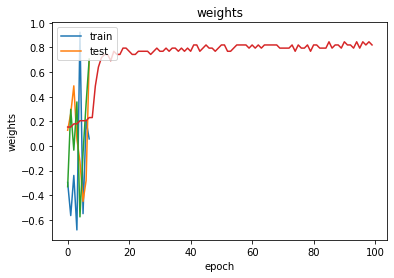

In [88]:
plt.plot(weights)
plt.plot(history.history['val_accuracy'])
plt.title('weights')
plt.ylabel('weights')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [73]:
from sklearn.metrics import confusion_matrix, classification_report 

y_pred = model.predict(x_test)

model_report = classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(model_report)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.85      0.79      0.81        14
           2       0.00      0.00      0.00         2

    accuracy                           0.78        23
   macro avg       0.54      0.60      0.56        23
weighted avg       0.75      0.78      0.76        23



In [74]:
model_conf = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(model_conf)

[[ 7  0  0]
 [ 2 11  1]
 [ 0  2  0]]


In [75]:
eval_score_test = model.evaluate(x_test,y_test,verbose = 1)
print ("Test Accuracy: %.3f%%" %(eval_score_test[1]*100)) 


# accuracy score on train data 
eval_score_train = model.evaluate(x_train,y_train,verbose=0)
print ("Train Accuracy: %.3f%%" %(eval_score_train[1]*100)) 

1/1 [==============================] - 0s 17ms/step - loss: 0.5173 - accuracy: 0.7826
Test Accuracy: 78.261%
Train Accuracy: 75.591%


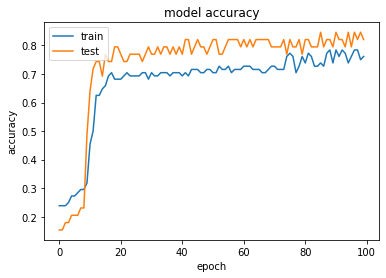

In [76]:
import matplotlib.pyplot as plt




plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

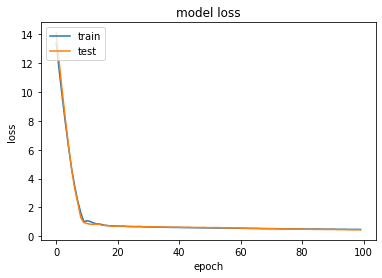

In [77]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


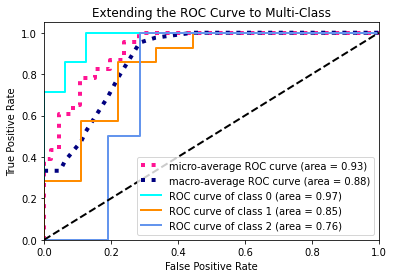

In [78]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle
from scipy import interp

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
lw = 2 # line_width
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()